In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
from matplotlib import pyplot as plt

In [3]:
sales=pd.read_excel('Superstore.xls', index_col=0)

In [13]:
sales.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales',
       'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'City', 'Zip Code', 'State', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

In [10]:
sales["Sales"].groupby(sales["Region"]).sum().values

array([4699167.24849999, 3416466.47100001, 3150219.35849999,
       3649747.746     ])

([<matplotlib.patches.Wedge at 0x2dfa1831da0>,
 [Text(0.6037793667996515, 0.9194838096600788, 'Central'),
  Text(-0.9940616496578294, 0.4710004635661787, 'East'),
  Text(-0.6482112489805673, -0.8887194026772756, 'South'),
  Text(0.7906759075915921, -0.7647428385766109, 'West')])

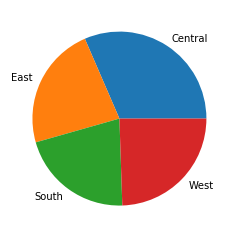

In [12]:
plt.pie(x=sales["Sales"].groupby(sales["Region"]).sum().values,labels=sales["Sales"].groupby(sales["Region"]).sum().index)

# Map the amount of high-priority shipments within 2010 on a timeline.

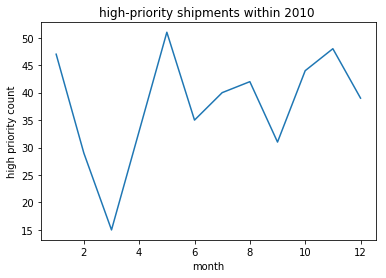

In [45]:
sales[['Order Priority', 'Ship Mode', 'Order Date' ]]
high_priority_shipments_2010=sales[(sales['Order Date'].dt.year==2010) & (sales['Order Priority']=='High')][['Order Priority', 'Order Date']]
high_priority_shipments_2010['month']=sales['Order Date'].dt.month
data=high_priority_shipments_2010['Order Priority'].groupby(high_priority_shipments_2010['month']).count()
x=data.index
y=data.values
plt.title('high-priority shipments within 2010 ')
plt.plot(x,y)
plt.xlabel('month')
plt.ylabel('high priority count')
plt.show()

# Graph out the minimum and maximum shipping costs per container type.

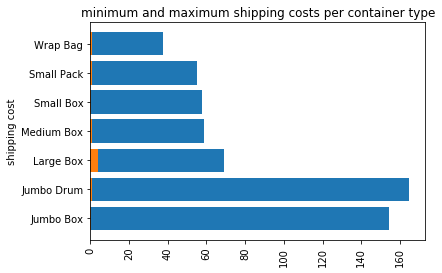

In [111]:
ship_cost_container=sales[['Shipping Cost', 'Product Container']]
max_cost=ship_cost_container.drop_duplicates()['Shipping Cost'].groupby(ship_cost_container['Product Container']).max()
min_cost=ship_cost_container.drop_duplicates()['Shipping Cost'].groupby(ship_cost_container['Product Container']).min()
x=max_cost.index
y1=max_cost.values
y2=min_cost.values
plt.title('minimum and maximum shipping costs per container type')
plt.barh(x,y1)
plt.barh(x,y2)
plt.xticks(rotation='vertical')
plt.ylabel('shipping cost')
plt.show()

# Compare profits per category amongst the different regions

In [149]:
data2.index

MultiIndex(levels=[['Central', 'East', 'South', 'West'], ['Appliances', 'Binders and Binder Accessories', 'Bookcases', 'Chairs & Chairmats', 'Computer Peripherals', 'Copiers and Fax', 'Envelopes', 'Labels', 'Office Furnishings', 'Office Machines', 'Paper', 'Pens & Art Supplies', 'Rubber Bands', 'Scissors, Rulers and Trimmers', 'Storage & Organization', 'Tables', 'Telephones and Communication']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]],
           names=['Region', 'Product Sub-Category'])

In [150]:
profit_category_region=sales[['Profit','Product Sub-Category', 'Region']]
data2=profit_category_region['Profit'].groupby([profit_category_region['Region'],profit_category_region['Product Sub-Category']]).sum()
data2=pd.DataFrame(data2)
central_x=data2.loc[('Central',)]['Profit'].values
central_label=data2.loc[('Central',)]['Profit'].index
east_x=data2.loc[('East',)]['Profit'].values
east_label=data2.loc[('East',)]['Profit'].index
south_x=data2.loc[('South',)]['Profit'].values
south_label=data2.loc[('South',)]['Profit'].index
west_x=data2.loc[('West',)]['Profit'].values
west_label=data2.loc[('West',)]['Profit'].index


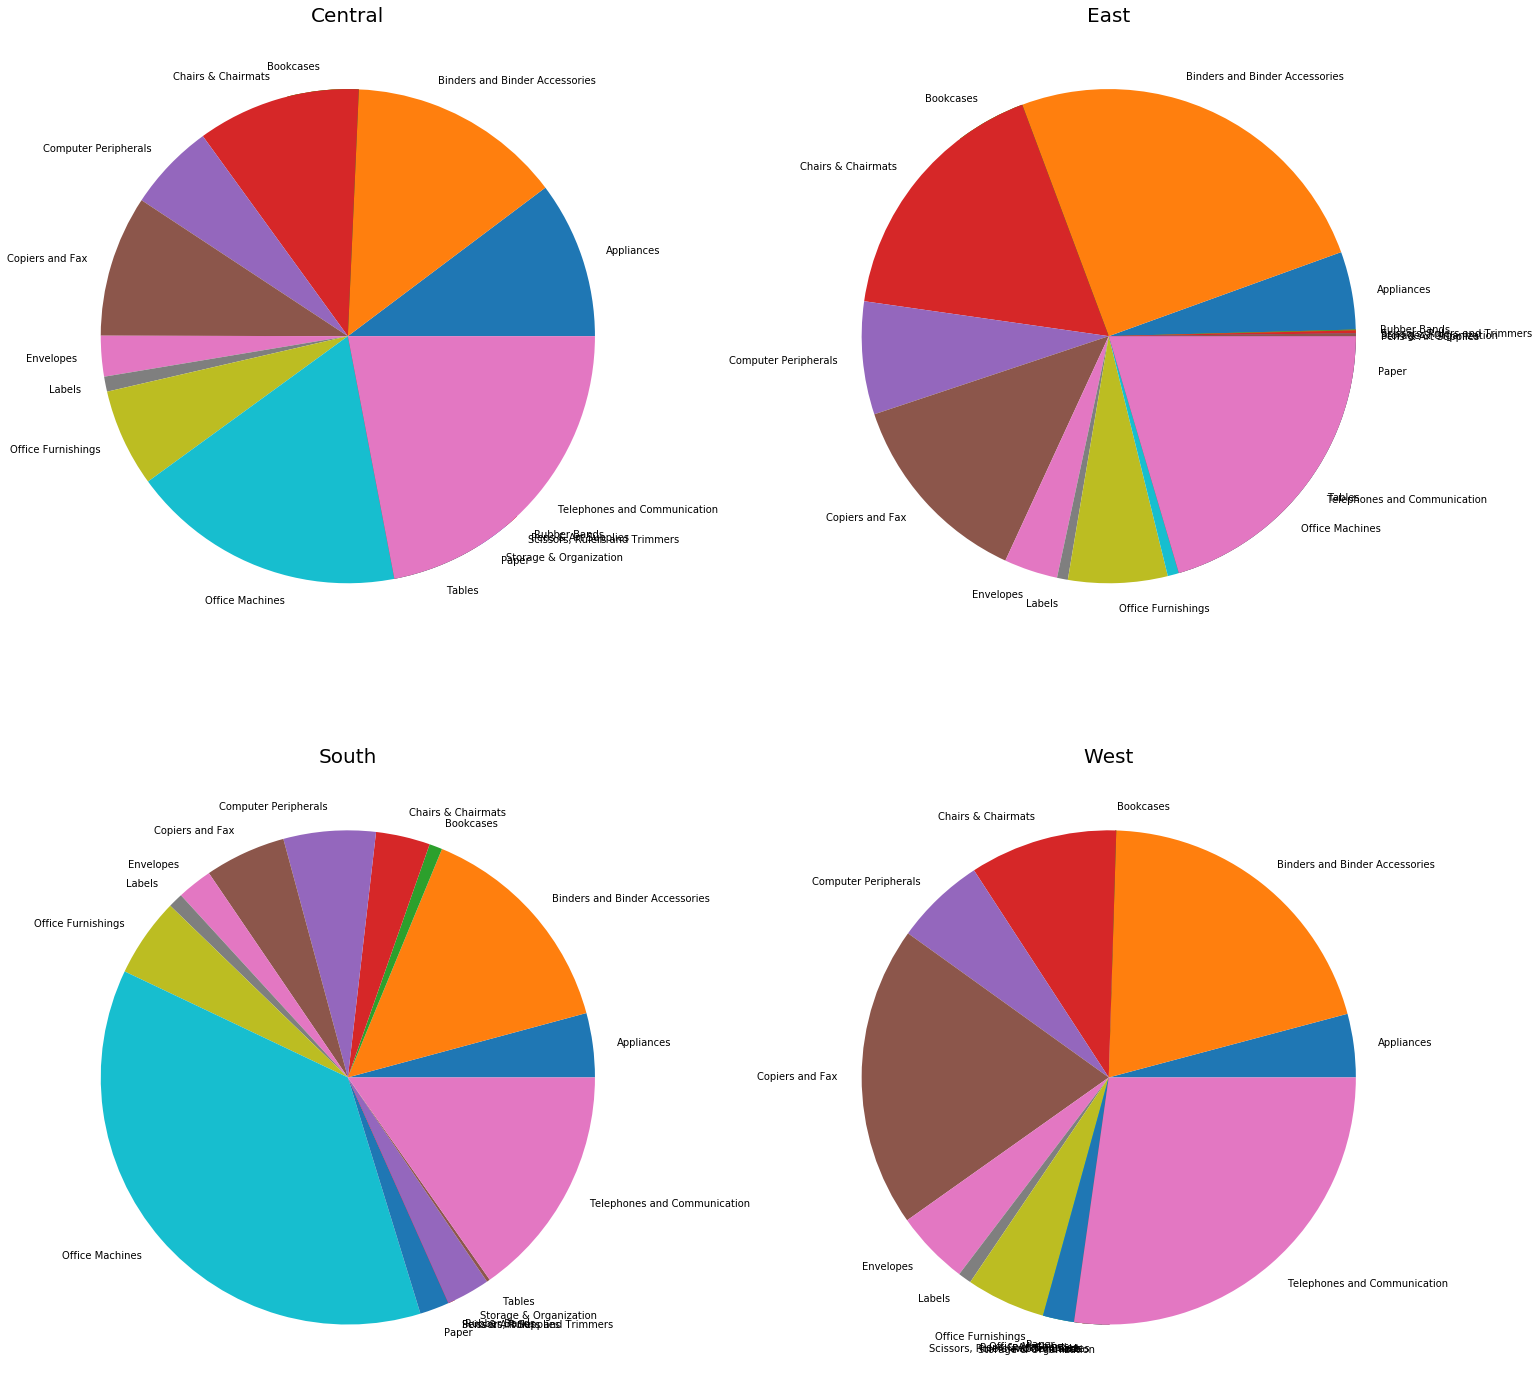

In [155]:
plt.figure(figsize=(25,25))
plt.subplot(221)
plt.title("Central", fontsize=20)
plt.pie(x=central_x,labels=central_label)
plt.subplot(222)
plt.title("East", fontsize=20)
plt.pie(x=east_x,labels=east_label)
plt.subplot(223)
plt.title("South", fontsize=20)
plt.pie(x=south_x,labels=south_label)
plt.subplot(224)
plt.title('West', fontsize=20)
plt.pie(x=west_x,labels=west_label)
plt.show()

# LA Bike share

In [253]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [297]:
la_map=gpd.read_file('CAMS_ZIPCODE_PARCEL_SPECIFIC.shp')

In [313]:
#la_map['geometry']=la_map['geometry'].centroid
#la_map['geometry']=la_map['geometry'].apply(convert_to_degree)
# for i in la_map['geometry'].values:
#     print()
#     break
la_map

,OBJECTID,ZIPCODE,Shape_area,Shape_len,geometry
0,1,90001,9.556340e+07,48677.278478,"POLYGON ((6487891.979804188 1818552.486203179,..."
1,2,90002,8.275222e+07,44972.017035,"POLYGON ((6490618.640033275 1808273.86994943, ..."
2,3,90003,1.026431e+08,63303.481758,"POLYGON ((6475914.309861943 1813754.750063762,..."
3,4,90004,8.395697e+07,52471.897635,"POLYGON ((6475644.032187283 1852884.78663294, ..."
4,5,90005,3.689779e+07,88445.001748,(POLYGON ((6459747.267392948 1845076.442341521...
5,6,90006,5.370769e+07,37830.417872,"POLYGON ((6475532.039957196 1842897.639940605,..."
6,7,90007,6.859206e+07,57884.233046,"POLYGON ((6476026.160031945 1836828.599913359,..."
7,8,90008,1.066446e+08,59093.418682,"POLYGON ((6450341.790140942 1829160.79011777, ..."
8,9,90010,4.543137e+06,41839.000459,"POLYGON ((6462399.353624195 1845251.52598086, ..."
9,10,90011,1.195795e+08,57120.064671,"POLYGON ((6487873.349920198 1823369.76987569, ..."


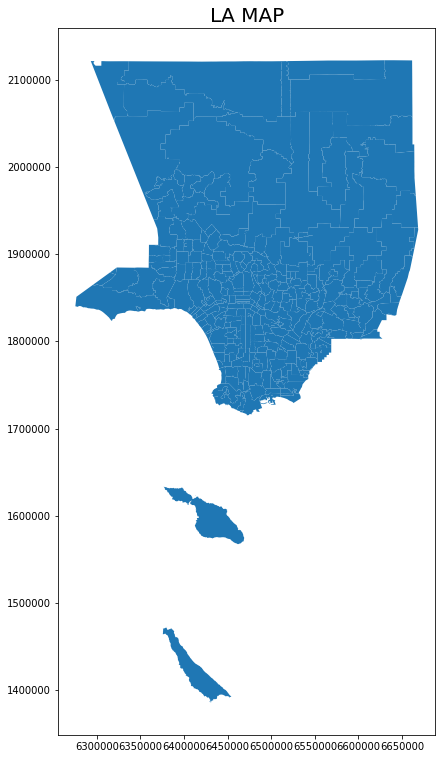

In [299]:
fig,ax=plt.subplots(figsize=(13,13))
plt.title("LA MAP",fontsize=20)
la_map.plot(ax=ax)
plt.show()

In [210]:
la_bike_data=pd.read_csv('metro-bike-share-trip-data.csv')
crs={'init':'epsg:4326'}

In [161]:
la_bike_data.columns

Index(['Trip ID', 'Duration', 'Start Time', 'End Time', 'Starting Station ID',
       'Starting Station Latitude', 'Starting Station Longitude',
       'Ending Station ID', 'Ending Station Latitude',
       'Ending Station Longitude', 'Bike ID', 'Plan Duration',
       'Trip Route Category', 'Passholder Type', 'Starting Lat-Long',
       'Ending Lat-Long', 'Neighborhood Councils (Certified)',
       'Council Districts', 'Zip Codes', 'LA Specific Plans',
       'Precinct Boundaries', 'Census Tracts'],
      dtype='object')

In [218]:
def get_year(value):
    if value is None:
        return None
    else:
        return value.split('-')[0]
def get_month(value):
    if value is None:
        return None
    else:
        return value.split('-')[1]
la_bike_data['Year']=la_bike_data['Start Time'].apply(get_year)
la_bike_data['Month']=la_bike_data['Start Time'].apply(get_month)

In [310]:
#la_bike_data

In [330]:
# get the cordinate 
start_cordinate=la_bike_data[(la_bike_data['Starting Station Latitude'].notnull()) &
                            (la_bike_data['Starting Station Longitude'].notnull())][['Starting Station Latitude','Starting Station Longitude','Year']]
end_cordinate=la_bike_data[(la_bike_data['Ending Station Latitude'].notnull()) &
                            (la_bike_data['Ending Station Longitude'].notnull())][['Ending Station Latitude','Ending Station Longitude','Year']]

In [220]:
start_latitude=start_cordinate['Starting Station Latitude']
start_longtitude=start_cordinate['Starting Station Longitude']

In [331]:
start_geometry=[Point(xy) for xy in zip(start_cordinate['Starting Station Longitude'], start_cordinate['Starting Station Latitude'])]
end_geometry=[Point(xy) for xy in zip(end_cordinate['Ending Station Longitude'],end_cordinate['Ending Station Latitude'])]

In [306]:
# def convert_degree(value):
#     return Point(abs(value.x)*36000, abs(value.y)*36000)

In [332]:
geo_df_start_cordinate=gpd.GeoDataFrame(start_cordinate,crs=crs, geometry=start_geometry)
geo_df_end_cordinate=gpd.GeoDataFrame(end_cordinate,crs=crs, geometry=end_geometry)
#geo_df_start_cordinate['geometry']= geo_df_start_cordinate['geometry'].apply(convert_degree)

In [327]:
#geo_df_start_cordinate

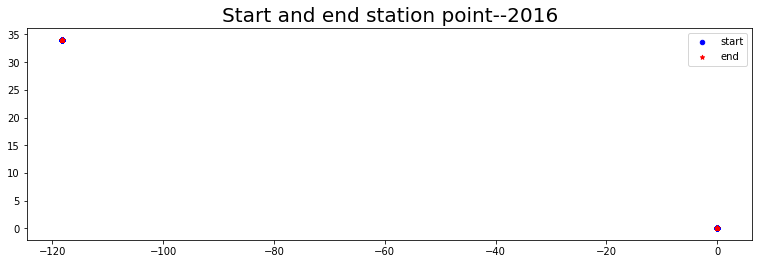

In [336]:
fig,ax=plt.subplots(figsize=(13,13))
#la_map.plot(ax=ax, alpha=0.4,color='gray')
#geo_df_start_cordinate[].plot(ax=ax, markersize=20, marker='o', color='blue',label="start")
plt.title('Start and end station point--2016', fontsize=20)
geo_df_start_cordinate[geo_df_start_cordinate['Year']=='2016'].plot(ax=ax, markersize=20, marker='o', color='blue',label="start")
geo_df_end_cordinate[geo_df_end_cordinate['Year']=='2016'].plot(ax=ax, markersize=20, marker='*', color='red',label="end")
plt.legend()

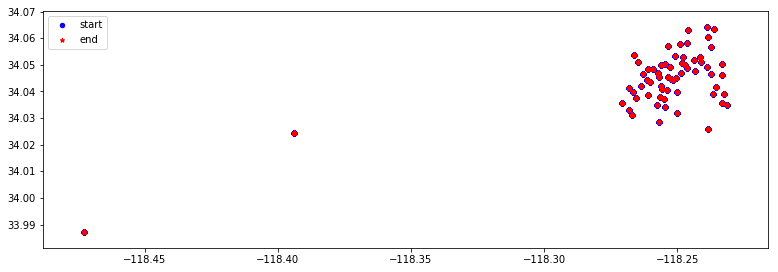

In [338]:
fig,ax=plt.subplots(figsize=(13,20))
geo_df_start_cordinate[geo_df_start_cordinate['Year']=='2017'].plot(ax=ax, markersize=20, marker='o', color='blue',label="start")
geo_df_end_cordinate[geo_df_end_cordinate['Year']=='2017'].plot(ax=ax, markersize=20, marker='*', color='red',label="end")
plt.legend()

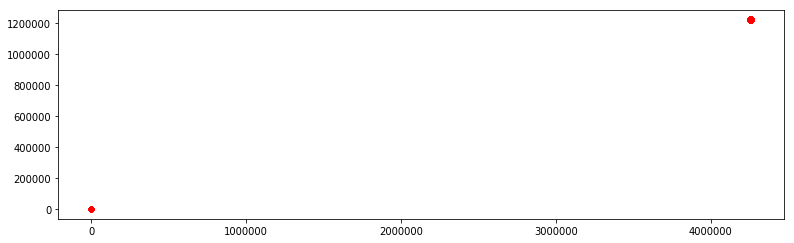

In [320]:
fig,ax=plt.subplots(figsize=(13,13))
geo_df_start_cordinate[geo_df_start_cordinate['Year']=='2016'].plot(ax=ax, markersize=20, marker='o', color='red',label="start")